In [8]:
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Load the dataset
data = pd.read_csv('StudentPerformanceFactors.csv')

In [10]:
# Preprocess the data
X = pd.get_dummies(data.drop(columns=['Exam_Score']), drop_first=True)  # One-hot encode categorical features
y = data['Exam_Score']

In [11]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
# Train a RandomForest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
[estimator.tree_.max_depth for estimator in rf_model.estimators_]

[18,
 21,
 20,
 19,
 20,
 20,
 19,
 20,
 20,
 22,
 19,
 23,
 19,
 19,
 20,
 20,
 22,
 19,
 20,
 21,
 19,
 20,
 19,
 20,
 21,
 19,
 22,
 18,
 19,
 20,
 21,
 19,
 19,
 20,
 19,
 19,
 20,
 21,
 22,
 21,
 21,
 21,
 21,
 23,
 22,
 21,
 19,
 20,
 20,
 19,
 22,
 20,
 18,
 20,
 21,
 19,
 19,
 21,
 20,
 19,
 19,
 19,
 19,
 19,
 20,
 19,
 20,
 21,
 21,
 21,
 21,
 19,
 19,
 19,
 21,
 21,
 19,
 20,
 19,
 21,
 20,
 20,
 21,
 22,
 20,
 20,
 19,
 20,
 20,
 19,
 20,
 19,
 20,
 20,
 18,
 21,
 19,
 21,
 20,
 19]

In [8]:
# Calculate SHAP values
explainer = shap.Explainer(rf_model, X_train)
shap_values = explainer(X_test)

 98%|===================| 1291/1322 [00:25<00:00]        

In [9]:
# Calculate mean absolute SHAP values
shap_means = abs(shap_values.values).mean(axis=0)
feature_names = X.columns

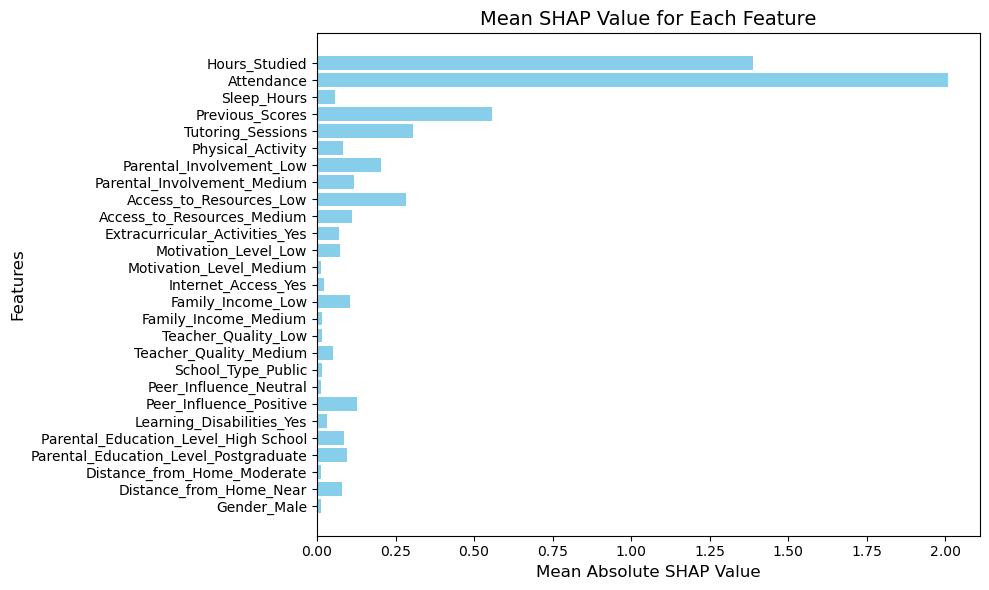

In [10]:
# Create a bar plot of mean SHAP values
plt.figure(figsize=(10, 6))
plt.barh(feature_names, shap_means, color='skyblue')
plt.xlabel('Mean Absolute SHAP Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Mean SHAP Value for Each Feature', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to show top features first
plt.tight_layout()
plt.show()

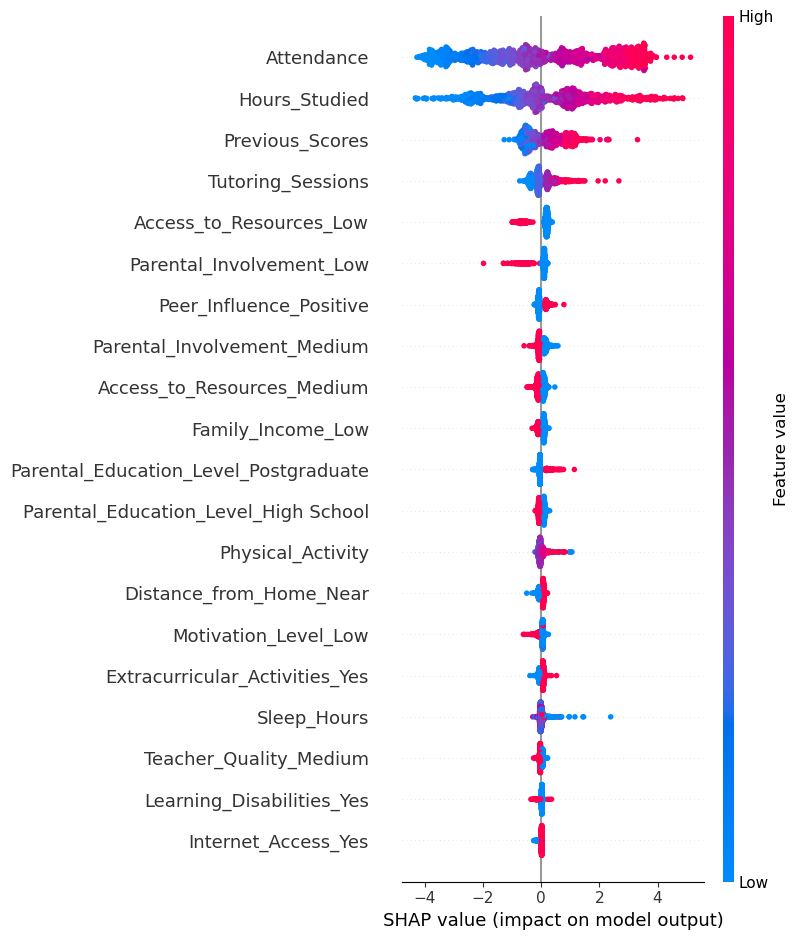

In [11]:
#The most influential feature. Students with higher attendance likely perform better in exams, as suggested by its dominance.
# Generate a summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

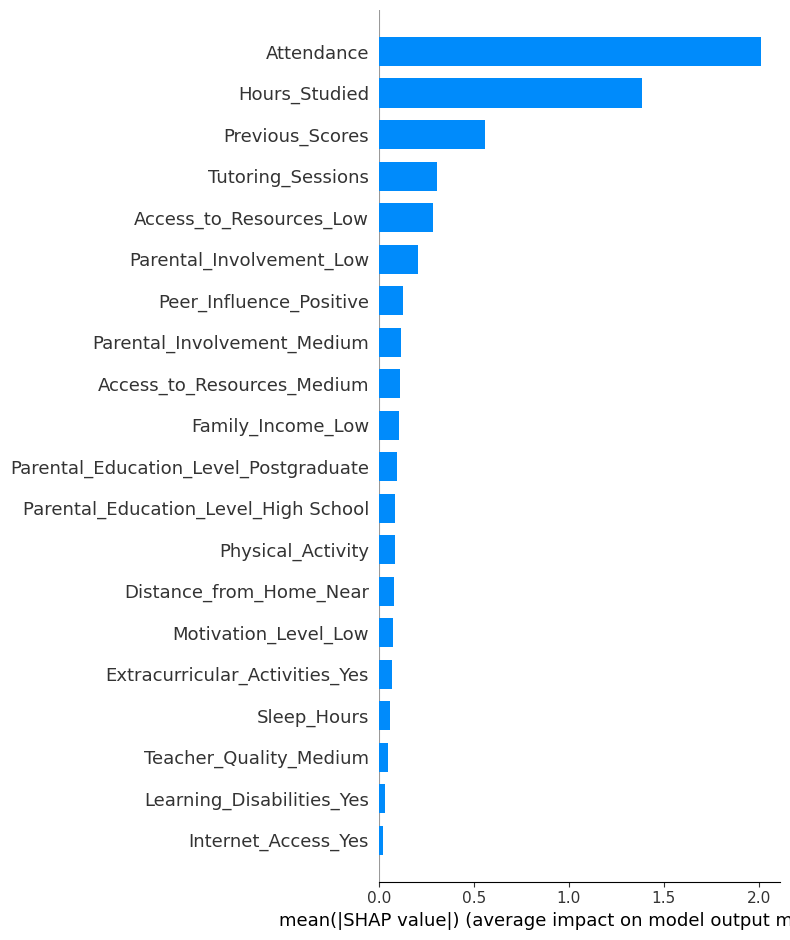

In [14]:
feature_names = X.columns
shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type='bar', plot_size='auto')

In [ ]:
#how to measure the accuracy of the model

In [19]:
import pandas as pd
X_test = pd.DataFrame(X_test, columns=feature_names)  # Replace `feature_names` with your column names
print(X_test.columns)


Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Parental_Involvement_Low',
       'Parental_Involvement_Medium', 'Access_to_Resources_Low',
       'Access_to_Resources_Medium', 'Extracurricular_Activities_Yes',
       'Motivation_Level_Low', 'Motivation_Level_Medium',
       'Internet_Access_Yes', 'Family_Income_Low', 'Family_Income_Medium',
       'Teacher_Quality_Low', 'Teacher_Quality_Medium', 'School_Type_Public',
       'Peer_Influence_Neutral', 'Peer_Influence_Positive',
       'Learning_Disabilities_Yes', 'Parental_Education_Level_High School',
       'Parental_Education_Level_Postgraduate', 'Distance_from_Home_Moderate',
       'Distance_from_Home_Near', 'Gender_Male'],
      dtype='object')


In [20]:
X_train = pd.DataFrame(X_train, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)

explainer = shap.Explainer(rf_model, X_train)
shap_values = explainer(X_test)


 98%|===================| 1292/1322 [00:25<00:00]        

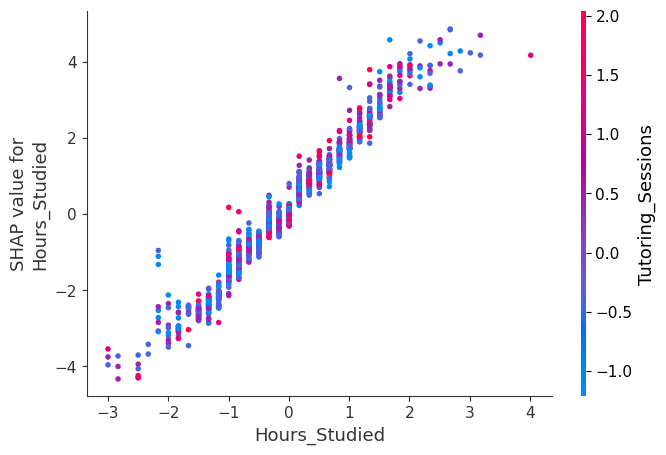

In [23]:
shap_values_array = shap_values.values  # Extract the SHAP values as a NumPy array
shap.dependence_plot('Hours_Studied', shap_values_array, X_test)

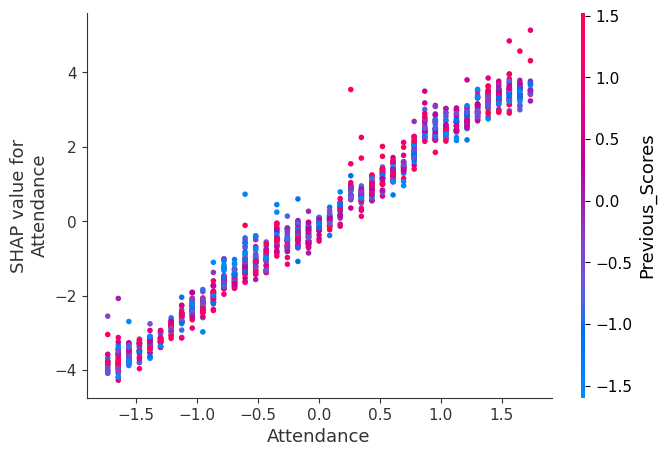

In [24]:
shap.dependence_plot('Attendance', shap_values_array, X_test)

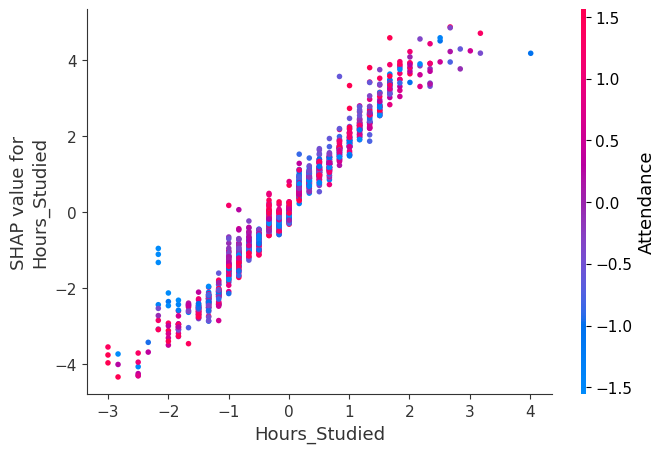

In [25]:
shap.dependence_plot('Hours_Studied', shap_values_array, X_test, interaction_index='Attendance')
